## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

## Data Pre-processing

In [2]:
file = open('data.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[6].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], line[5], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

In [3]:
processedList

[['-1.50', '0.17', '9.85', '0.17', '-0.02', '-0.00', 'sitting'],
 ['-1.47', '0.32', '9.84', '0.11', '-0.04', '-0.00', 'sitting'],
 ['-1.46', '0.27', '9.86', '0.21', '-0.02', '-0.01', 'sitting'],
 ['-1.44', '0.40', '9.90', '0.22', '-0.02', '-0.01', 'sitting'],
 ['-1.43', '0.34', '9.96', '0.19', '-0.01', '0.00', 'sitting'],
 ['-1.50', '0.35', '9.96', '0.21', '-0.02', '-0.01', 'sitting'],
 ['-1.54', '0.42', '9.87', '0.16', '-0.01', '-0.02', 'sitting'],
 ['-1.47', '0.31', '9.86', '0.12', '-0.01', '-0.02', 'sitting'],
 ['-1.48', '0.34', '9.83', '0.17', '-0.02', '-0.01', 'sitting'],
 ['-1.44', '0.43', '9.87', '0.20', '-0.02', '-0.00', 'sitting'],
 ['-1.39', '0.43', '9.84', '0.19', '-0.01', '-0.00', 'sitting'],
 ['-1.41', '0.45', '9.97', '0.18', '-0.01', '-0.01', 'sitting'],
 ['-1.50', '0.37', '9.90', '0.18', '-0.01', '-0.01', 'sitting'],
 ['-1.40', '0.36', '9.86', '0.18', '-0.02', '-0.01', 'sitting'],
 ['-1.48', '0.45', '9.90', '0.18', '-0.02', '-0.00', 'sitting'],
 ['-1.45', '0.41', '9.85',

In [4]:
columns = ['AX', 'AY', 'AZ', 'GX', 'GY', 'GZ', 'label']
df = pd.DataFrame(data = processedList, columns = columns)
df.head()

,AX,AY,AZ,GX,GY,GZ,label
0,-1.50,0.17,9.85,0.17,-0.02,-0.00,sitting
1,-1.47,0.32,9.84,0.11,-0.04,-0.00,sitting
2,-1.46,0.27,9.86,0.21,-0.02,-0.01,sitting
3,-1.44,0.40,9.90,0.22,-0.02,-0.01,sitting
4,-1.43,0.34,9.96,0.19,-0.01,0.00,sitting


In [5]:
df.shape

(1500, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AX      1500 non-null   object
 1   AY      1500 non-null   object
 2   AZ      1500 non-null   object
 3   GX      1500 non-null   object
 4   GY      1500 non-null   object
 5   GZ      1500 non-null   object
 6   label   1500 non-null   object
dtypes: object(7)
memory usage: 82.2+ KB


In [7]:
df.isnull().sum()

AX       0
AY       0
AZ       0
GX       0
GY       0
GZ       0
label    0
dtype: int64

In [8]:
df[["AX", "AY", "AZ", "GX", "GY", "GZ"]] = df[["AX", "AY", "AZ", "GX", "GY", "GZ"]].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AX      1500 non-null   float64
 1   AY      1500 non-null   float64
 2   AZ      1500 non-null   float64
 3   GX      1500 non-null   float64
 4   GY      1500 non-null   float64
 5   GZ      1500 non-null   float64
 6   label   1500 non-null   object 
dtypes: float64(6), object(1)
memory usage: 82.2+ KB


## Explore 

In [10]:
numOfSamples = 10;
activities = df['label'].value_counts().index
activities

Index(['sitting', 'standing', 'walking'], dtype='object')

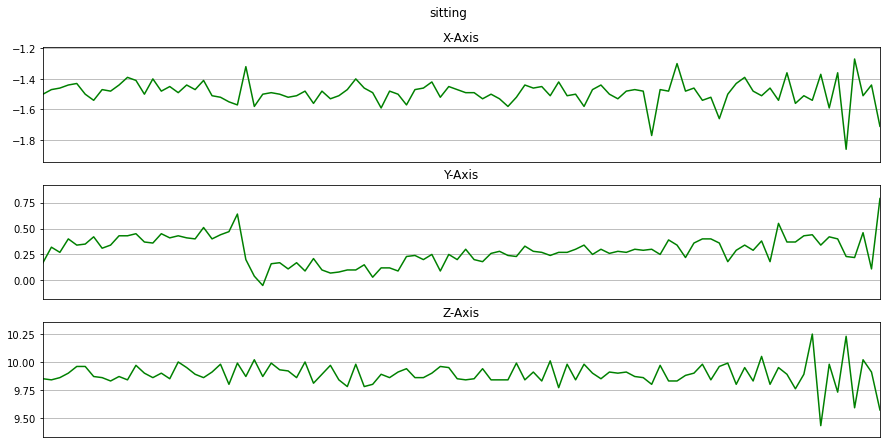

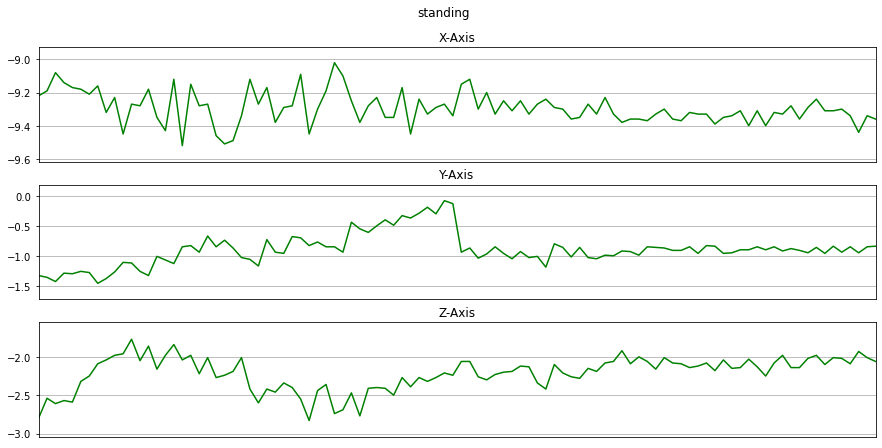

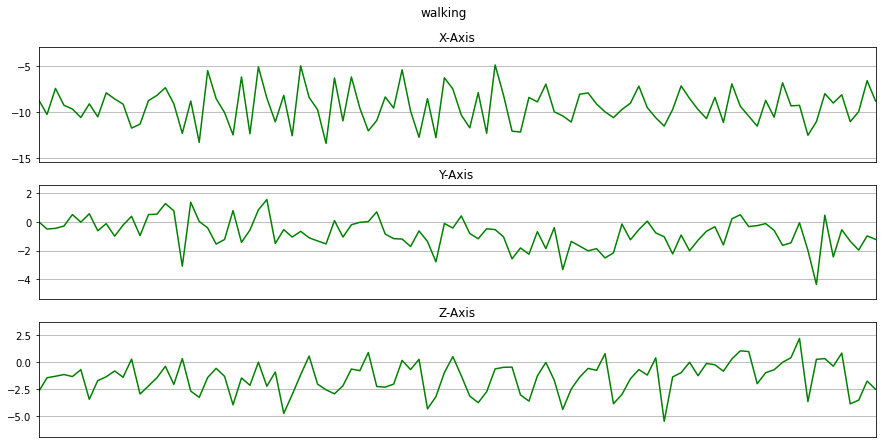

In [11]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, list(range(1,101)), data['AX'], 'X-Axis')
    plot_axis(ax1, list(range(1,101)), data['AY'], 'Y-Axis')
    plot_axis(ax2, list(range(1,101)), data['AZ'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = df[(df['label'] == activity)][:numOfSamples*10]
    plot_activity(activity, data_for_plot)

## Model Trainig

In [12]:
Features = df[["AX", "AY", "AZ", "GX", "GY", "GZ"]]
y = df["label"]

In [13]:
Encoder = LabelEncoder()
Label = Encoder.fit_transform(y)
Label

array([0, 0, 0, ..., 2, 2, 2])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size = 0.20, random_state = 0)

In [15]:
classifier = SVC(kernel = 'rbf', gamma=0.4)
classifier.fit(X_train, y_train)

SVC(gamma=0.4)

In [16]:
y_pred = classifier.predict(X_test)

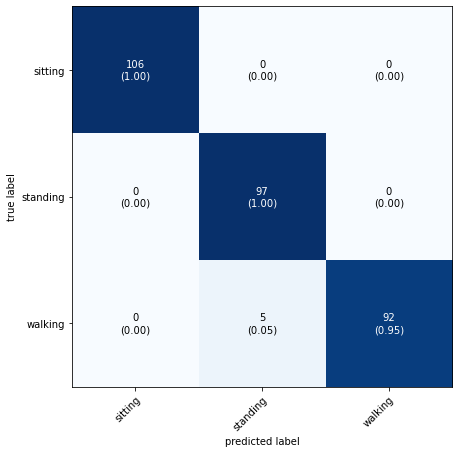

In [17]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=Encoder.classes_, show_normed=True, figsize=(7,7));

In [18]:
accuracy_score(y_test, y_pred)

0.9833333333333333

In [19]:
from micromlgen import port

In [20]:
LABELS = activities #our existing labels
classMap = {} #create an empty dict
for i, label in zip(range(len(LABELS)),LABELS): #interate over the range and the labels at the same time 
  classMap[i]=label #fill our dict

print(classMap)

{0: 'sitting', 1: 'standing', 2: 'walking'}


In [21]:
c_code = port(classifier,classmap=classMap) #convert our model

#Let's write it into a .h file
modelFile = open("model.h", "w")
modelFile.write(c_code)
modelFile.close()

#Let's print the size of the .h file
import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 50,260 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
